In [1]:

import networkx as nx
import numpy as np
import pandas as pd
import igraph as ig
from networkx.generators.community import LFR_benchmark_graph
import sklearn.metrics

import seaborn as sns
import matplotlib.pyplot as plt

The parameters of the LFR benchmark graphs are: 
average degree 〈k〉 = 20,
maximum degree kmax = 50, 
minimum community size cmin = 10, 
maximum community size cmax = 50, 
the degree exponent is τ1 = 2, the community size exponent is τ2 = 3. Each panel correspond to a clustering algorithm, indicated by the label. The two sets of plots correspond to networks with 1000 (a) and 5000 (b) vertices.

In [2]:

def add_true_labels(G):

    cm = [(G.nodes[v]["community"]) for v in G]
    unique_cm = []

    # iterate through the list of sets
    for set_ in cm:
        # check if the set is already in the list of unique sets
        if set_ not in unique_cm:
            # if not, add it to the list of unique sets
            unique_cm.append(set_)

    df = pd.DataFrame(columns=['community']) 
    for comm_id, members in enumerate(unique_cm):
        for node in list(members):
            df.at[node, 'community'] = comm_id + 1 
            
    nx.set_node_attributes(G, df.community, "community")
    print(comm_id) # last label ie number of communities
    return(G)

 
 

In [3]:

# Generate a LFR_benchmark_graph
seed=123
n = 1000
tau1 = 2
tau2 = 3
mu = 0.5
average_degree=5
max_degree = 50
min_community=  20
max_community = 50
max_iters = 10000

In [4]:
mui = 50
G = LFR_benchmark_graph( n=n, 
                        tau1=tau1, 
                        tau2=tau2, 
                        mu=mui/100, 
                        average_degree=average_degree, 
                        min_community=min_community, 
                        max_community=max_community,
                        max_degree = max_degree,
                        max_iters = max_iters,
                        seed=seed,
                        tol = 2)

In [5]:
mui_range = range(10,99,5)
 
for mui in mui_range:
    #generate benchmark
    print("generating benchmark for mu = ", mui/100)
    G = LFR_benchmark_graph( n=n, 
                        tau1=tau1, 
                        tau2=tau2, 
                        mu=mui/100, 
                        average_degree=average_degree, 
                        min_community=min_community, 
                        max_community=max_community,
                        max_degree = max_degree,
                        max_iters = max_iters,
                        seed=seed)
    
    #extract true labels
    gt = add_true_labels(G)
    nx.write_gml(gt, f"FLR_benchmark_{mui}.gml")

    


generating benchmark for mu =  0.1
36
generating benchmark for mu =  0.15
36
generating benchmark for mu =  0.2
36
generating benchmark for mu =  0.25
36
generating benchmark for mu =  0.3
36
generating benchmark for mu =  0.35
36
generating benchmark for mu =  0.4
36
generating benchmark for mu =  0.45
36
generating benchmark for mu =  0.5
36
generating benchmark for mu =  0.55
36
generating benchmark for mu =  0.6
36
generating benchmark for mu =  0.65
36
generating benchmark for mu =  0.7
36
generating benchmark for mu =  0.75
36
generating benchmark for mu =  0.8
36
generating benchmark for mu =  0.85
36
generating benchmark for mu =  0.9
36
generating benchmark for mu =  0.95
36


In [6]:

results = pd.DataFrame (columns=['mu', 'nc', 'NMI']) 
for mui in mui_range:
    print(mui)
    g = ig.read(f"FLR_benchmark_{str(mui)}.gml")
    true_labels = g.vs['community']
    for i in range(100):
        mm = g.community_multilevel()
        #print("***", max(mm.membership), max(true_labels))
        results = results.append( {'mu':mui/100,
                        'nc':max(mm.membership),
                        'NMI':sklearn.metrics.normalized_mutual_info_score( true_labels, mm.membership)},
                        ignore_index = True)

10
*** 32 37.0
*** 33 37.0
*** 34 37.0
*** 33 37.0
*** 33 37.0
*** 33 37.0
*** 33 37.0
*** 34 37.0
*** 32 37.0
*** 33 37.0
*** 33 37.0
*** 33 37.0
*** 31 37.0
*** 31 37.0
*** 33 37.0
*** 34 37.0
*** 32 37.0
*** 33 37.0
*** 33 37.0
*** 33 37.0
*** 33 37.0
*** 32 37.0
*** 33 37.0
*** 34 37.0
*** 34 37.0
*** 33 37.0
*** 33 37.0
*** 33 37.0
*** 33 37.0
*** 33 37.0
*** 33 37.0
*** 32 37.0
*** 33 37.0
*** 33 37.0
*** 33 37.0
*** 34 37.0
*** 33 37.0
*** 34 37.0
*** 31 37.0
*** 33 37.0
*** 33 37.0
*** 34 37.0
*** 32 37.0
*** 33 37.0
*** 33 37.0
*** 34 37.0
*** 34 37.0
*** 31 37.0
*** 33 37.0
*** 33 37.0
*** 33 37.0
*** 33 37.0
*** 33 37.0
*** 32 37.0
*** 33 37.0
*** 34 37.0
*** 33 37.0
*** 33 37.0
*** 33 37.0
*** 32 37.0
*** 33 37.0
*** 33 37.0
*** 32 37.0
*** 33 37.0
*** 34 37.0
*** 32 37.0
*** 34 37.0
*** 34 37.0
*** 32 37.0
*** 32 37.0
*** 32 37.0
*** 33 37.0
*** 34 37.0
*** 34 37.0
*** 34 37.0
*** 32 37.0
*** 33 37.0
*** 32 37.0
*** 34 37.0
*** 33 37.0
*** 32 37.0
*** 34 37.0
*** 33 37.0
*

In [10]:
results.to_csv('results.csv')

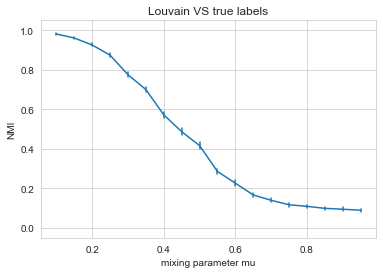

In [11]:
sns.set_style("whitegrid")
pl = sns.lineplot(x="mu", y="NMI", data=results, estimator=np.mean, ci='sd', err_style='bars')
pl.set(xlabel ="mixing parameter mu", ylabel = "NMI", title ='Louvain VS true labels')
pl.set(ylim =(-0.05,1.05))
plt.show()



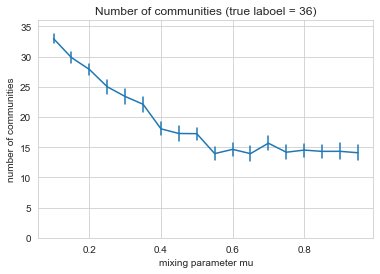

In [13]:
sns.set_style("whitegrid")
pl = sns.lineplot(x="mu", y="nc", data=results, estimator=np.mean, ci='sd', err_style='bars')
pl.set(xlabel ="mixing parameter mu", ylabel = "number of communities", title ='Number of communities (true laboel = 36)')
pl.set(ylim =(0,36))

plt.show()